In [55]:
import pandas as pd
import numpy as np

In [56]:
df = pd.read_csv("/content/drive/MyDrive/Courses/AI Super Course/9/framingham.csv")

In [57]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [58]:
df.shape

(4238, 16)

In [59]:
df_nans_dropped = df.dropna()
df_nans_dropped.shape

(3656, 16)

In [60]:
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [61]:
df.mean()

male                 0.429212
age                 49.584946
education            1.978950
currentSmoker        0.494101
cigsPerDay           9.003089
BPMeds               0.029630
prevalentStroke      0.005899
prevalentHyp         0.310524
diabetes             0.025720
totChol            236.721585
sysBP              132.352407
diaBP               82.893464
BMI                 25.802008
heartRate           75.878924
glucose             81.966753
TenYearCHD           0.151958
dtype: float64

In [62]:
df_nans_filled = df.fillna(df.mean())

In [63]:
df_nans_filled.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.00000,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,1
4234,1,51,3.0,1,43.0,0.00000,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4235,0,48,2.0,1,20.0,0.02963,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1.0,1,15.0,0.00000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753,0
4237,0,52,2.0,0,0.0,0.00000,0,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0


In [64]:
equal0 = df_nans_filled["TenYearCHD"] == 0
df_equal0 = df_nans_filled[equal0]
equal1 = df_nans_filled["TenYearCHD"] == 1
df_equal1 = df_nans_filled[equal1]

In [65]:
df_equal1.shape

(644, 16)

In [66]:
df_0_equal1 = df_equal0.sample(df_equal1.shape[0])

In [67]:
df_0_equal1.shape

(644, 16)

In [68]:
df_equal = pd.concat([df_0_equal1, df_equal1])

In [69]:
df_equal

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
701,1,40,1.0,0,0.0,0.00000,0,0,0,206.0,110.0,67.5,25.88,62.0,80.0,0
1192,0,41,1.0,1,15.0,0.00000,0,0,0,242.0,139.0,80.0,19.68,72.0,60.0,0
3145,0,42,2.0,1,20.0,0.00000,0,0,0,310.0,124.0,72.5,22.32,96.0,74.0,0
1566,1,58,1.0,1,30.0,0.02963,0,0,0,200.0,144.0,90.0,24.90,75.0,76.0,0
3314,0,47,1.0,0,0.0,0.00000,1,0,0,220.0,124.0,75.5,24.71,65.0,68.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,1,50,1.0,0,0.0,0.00000,0,0,0,260.0,119.0,74.0,21.85,80.0,72.0,1
4223,1,56,4.0,0,0.0,1.00000,0,1,0,287.0,149.0,98.0,21.68,90.0,75.0,1
4226,1,58,1.0,0,0.0,0.00000,0,0,0,233.0,125.5,84.0,26.05,67.0,76.0,1
4232,1,68,1.0,0,0.0,0.00000,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1


In [70]:
df_x = df_equal.drop(labels=["TenYearCHD"], axis=1)
df_y = df_equal[["TenYearCHD"]].copy()

In [85]:
print(df_x.shape, df_y.shape)

(1288, 15) (1288, 1)


In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [88]:
x_nrm = scaler.fit_transform(df_x)

In [92]:
print(x_nrm.std(0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [71]:
from sklearn.model_selection import train_test_split

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x_nrm, df_y.values.reshape((-1, )), train_size=0.8)

In [108]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1030, 15) (258, 15) (1030,) (258,)


In [109]:
print(df_x.shape)

(1288, 15)


In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
model = LogisticRegression()

In [112]:
model.fit(x_train, y_train)

LogisticRegression()

In [113]:
y_test_prd = model.predict(x_test)

In [114]:
y_test_proba = model.predict_proba(x_test)

In [115]:
print(y_test_proba)

[[0.3006278  0.6993722 ]
 [0.41637575 0.58362425]
 [0.77707039 0.22292961]
 [0.10868184 0.89131816]
 [0.10344365 0.89655635]
 [0.52236629 0.47763371]
 [0.57349714 0.42650286]
 [0.66715608 0.33284392]
 [0.1744739  0.8255261 ]
 [0.34363938 0.65636062]
 [0.40096887 0.59903113]
 [0.68036341 0.31963659]
 [0.4170779  0.5829221 ]
 [0.71914709 0.28085291]
 [0.81619044 0.18380956]
 [0.62085844 0.37914156]
 [0.39771558 0.60228442]
 [0.09264394 0.90735606]
 [0.46637437 0.53362563]
 [0.65586103 0.34413897]
 [0.66984905 0.33015095]
 [0.36038329 0.63961671]
 [0.78295771 0.21704229]
 [0.50326917 0.49673083]
 [0.3599547  0.6400453 ]
 [0.63925079 0.36074921]
 [0.73613026 0.26386974]
 [0.32057133 0.67942867]
 [0.30966017 0.69033983]
 [0.23581421 0.76418579]
 [0.62248152 0.37751848]
 [0.29504424 0.70495576]
 [0.30568088 0.69431912]
 [0.41378287 0.58621713]
 [0.5036826  0.4963174 ]
 [0.13678062 0.86321938]
 [0.47506812 0.52493188]
 [0.61174977 0.38825023]
 [0.47433888 0.52566112]
 [0.680907   0.319093  ]


In [117]:
print(y_test_prd)
print(y_test)

[1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1
 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0
 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1
 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0
 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1
 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1]
[0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0
 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0
 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1
 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0
 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1
 0 0 0 0 0 0 1 1 1 1 1 0 0

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df[["age"]].hist(bins=30)

In [119]:
from sklearn.metrics import mean_squared_error as mse

loss_skl = mse(y_test, y_test_prd)

print(loss_skl)

0.32170542635658916


In [118]:
loss = ((y_test - y_test_prd)**2).mean()

print(loss)

0.32170542635658916


In [120]:
import matplotlib.pyplot as plt

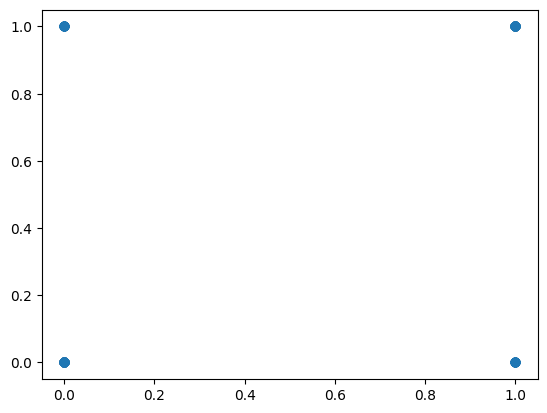

In [121]:
plt.scatter(y_test_prd, y_test)

In [122]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_prd)

print(cm)

[[93 42]
 [41 82]]


In [123]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_test_prd)

print(cr)

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       135
           1       0.66      0.67      0.66       123

    accuracy                           0.68       258
   macro avg       0.68      0.68      0.68       258
weighted avg       0.68      0.68      0.68       258



In [ ]:
y_test_temp = np.zeros((100, 1))

y_test_temp[:2] = 1

y_test_prd_temp = np.zeros((100, 1))

print(y_test_temp)

In [125]:
print(mse(y_test_temp, y_test_prd_temp))

0.02


In [126]:
print(confusion_matrix(y_test_temp, y_test_prd_temp))

[[98  0]
 [ 2  0]]


In [127]:
print(classification_report(y_test_temp, y_test_prd_temp))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        98
         1.0       0.00      0.00      0.00         2

    accuracy                           0.98       100
   macro avg       0.49      0.50      0.49       100
weighted avg       0.96      0.98      0.97       100



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
